In [ ]:
import pandas as pd
import seaborn as sns

## Data load

In [ ]:
df=pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Data preprocessing

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Missing values

In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### Boxplot
<img src="boxplot.jpg" alt="drawing" width="600"/>

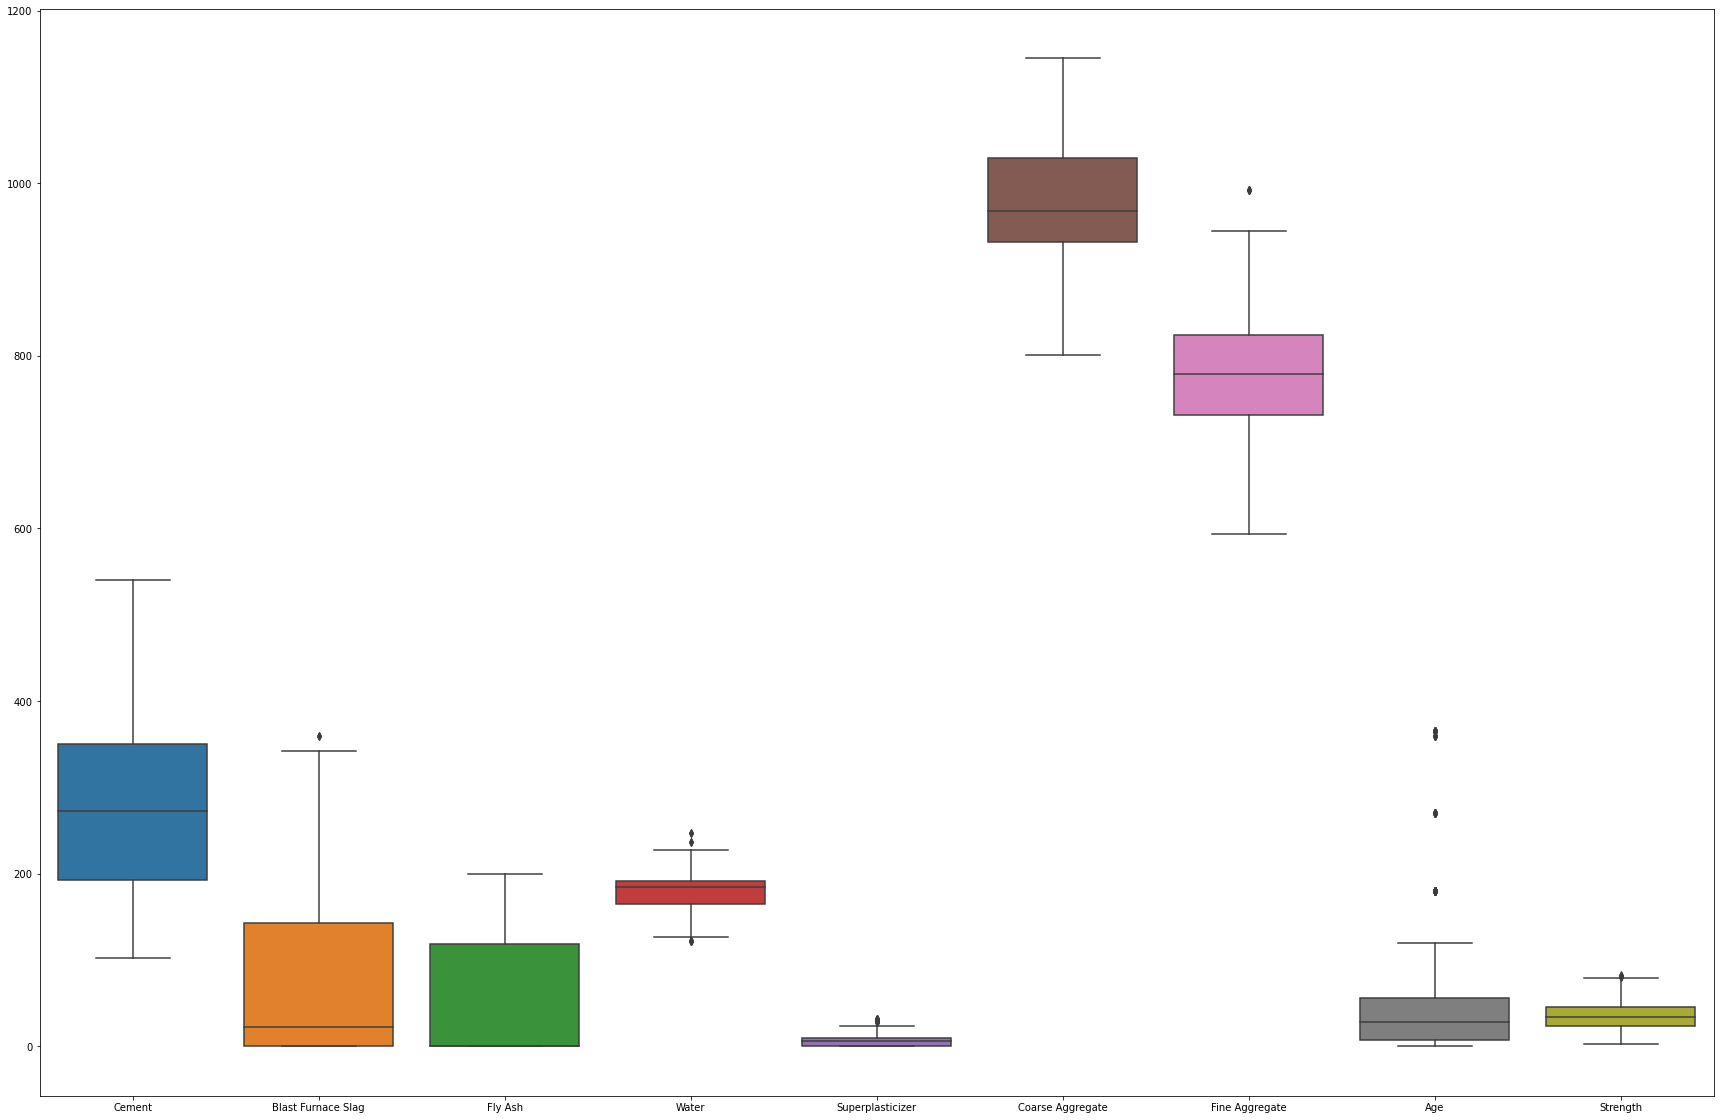

In [ ]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df)
plt.show()

### Outliers

In [ ]:
outlier_index=[]
for i in range(df.shape[1]):
    Q1 = df[df.columns[i]].quantile(0.25)
    Q3 = df[df.columns[i]].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[df.columns[i]] < Q1 - 1.5 * IQR) | (df[df.columns[i]] > Q3 + 1.5 *IQR)
    outlier_index+=list(df.loc[filter].index)
    print(df.columns[i],":",list(df.loc[filter].index))
print('===>Number of outliers:', len(outlier_index))

Cement : []
Blast Furnace Slag : [553, 559]
Fly Ash : []
Water : [224, 225, 226, 227, 228, 862, 873, 936, 1019]
Superplasticizer : [76, 79, 99, 102, 122, 125, 145, 148, 168, 171]
Coarse Aggregate : []
Fine Aggregate : [74, 97, 120, 143, 166]
Age : [2, 3, 4, 6, 12, 17, 19, 20, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 39, 41, 42, 43, 47, 50, 51, 56, 58, 60, 61, 63, 64, 65, 66, 603, 604, 609, 610, 615, 616, 619, 620, 621, 622, 755, 756, 762, 768, 769, 791, 792, 794, 795, 797, 798, 813, 814, 820, 823]
Strength : [0, 153, 181, 381]
===>Number of outliers: 89


In [ ]:
df.drop(index=outlier_index, inplace=True)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
1,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
2,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


## Regression

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of X_train: (658, 8)
Shape of y_train: (658,)


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
en=ElasticNet().fit(X_train, y_train)
print(en.score(X_train, y_train))
print(en.score(X_test, y_test))

0.7776007878735536
0.7450413920418812


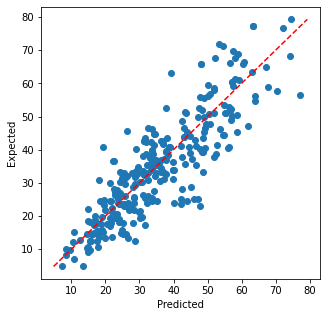

In [ ]:
predicted = en.predict(X_test)
expected = y_test
plt.figure(figsize=(5,5))
plt.scatter(predicted, expected)
plt.plot([min(expected),max(expected)],[min(expected),max(expected)],'--r')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr=SVR().fit(X_train, y_train)
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.21425411032094044
0.19133232222665364


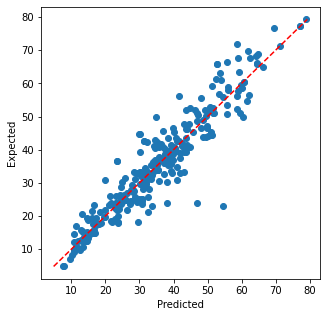

In [ ]:
predicted = svr.predict(X_test)
expected = y_test
plt.figure(figsize=(5,5))
plt.scatter(predicted, expected)
plt.plot([min(expected),max(expected)],[min(expected),max(expected)],'--r')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9867315248737443
0.8843537841625009


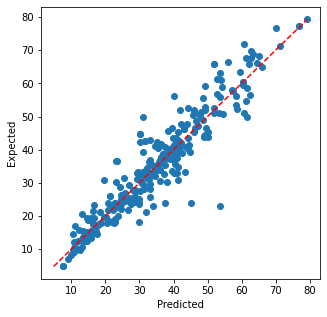

In [ ]:
predicted = rf.predict(X_test)
expected = y_test
plt.figure(figsize=(5,5))
plt.scatter(predicted, expected)
plt.plot([min(expected),max(expected)],[min(expected),max(expected)],'--r')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Text(0, 0.5, 'FEATURE NAMES')

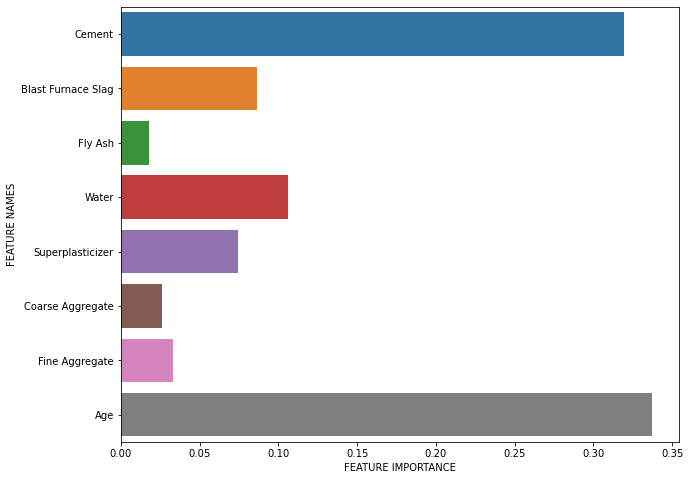

In [ ]:
fi_df={'feature_names':df.columns[:-1],'feature_importance':rf.feature_importances_}
plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'C': [1.0,2.0,3.0]}]
gs=GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5)
result=gs.fit(X_train, y_train)

print('최적 점수: ', result.best_score_)
print('최적 파라미터: ', result.best_params_)
pd.DataFrame(result.cv_results_)

최적 점수:  0.7676599121048591
최적 파라미터:  {'C': 2.0, 'kernel': 'linear'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.337744,0.639909,0.002797,0.000389,1.0,linear,"{'C': 1.0, 'kernel': 'linear'}",0.742339,0.813922,0.761749,0.786365,0.725449,0.765965,0.031412,2
1,0.010765,0.001931,0.002792,0.000399,1.0,poly,"{'C': 1.0, 'kernel': 'poly'}",0.401294,0.442367,0.436739,0.461744,0.392596,0.426948,0.026010,6
2,0.013963,0.001784,0.008577,0.001197,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.162060,0.163398,0.184775,0.192317,0.153894,0.171289,0.014657,9
3,0.022339,0.002721,0.005984,0.001092,1.0,sigmoid,"{'C': 1.0, 'kernel': 'sigmoid'}",-0.000171,-0.005837,0.020878,0.018051,0.003205,0.007225,0.010441,12
4,5.198143,1.802668,0.002793,0.000399,2.0,linear,"{'C': 2.0, 'kernel': 'linear'}",0.742455,0.819156,0.768243,0.782130,0.726316,0.767660,0.032268,1
5,0.009570,0.000485,0.002797,0.000401,2.0,poly,"{'C': 2.0, 'kernel': 'poly'}",0.546403,0.611629,0.576476,0.613831,0.545676,0.578803,0.029857,5
6,0.012970,0.001270,0.007381,0.001864,2.0,rbf,"{'C': 2.0, 'kernel': 'rbf'}",0.253598,0.268553,0.274649,0.301920,0.241703,0.268085,0.020465,8
7,0.017553,0.001943,0.004582,0.000789,2.0,sigmoid,"{'C': 2.0, 'kernel': 'sigmoid'}",0.021063,0.017524,0.040539,0.037793,0.021417,0.027667,0.009527,11
8,9.436187,2.430377,0.002593,0.000488,3.0,linear,"{'C': 3.0, 'kernel': 'linear'}",0.740607,0.805442,0.762767,0.787194,0.733161,0.765834,0.027344,3
9,0.011374,0.001487,0.002395,0.000488,3.0,poly,"{'C': 3.0, 'kernel': 'poly'}",0.618974,0.702170,0.639673,0.682390,0.605045,0.649650,0.037042,4
